### Import the dependacies

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

### Load the dataset

In [21]:
df = pd.read_csv('customer_churn.csv') 
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5511,6586-MYGKD,Male,0,Yes,No,70,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),76.95,5289.8,No
4535,9647-ERGBE,Female,0,Yes,Yes,30,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.05,3046.15,Yes
2403,0310-SUCIN,Female,0,Yes,No,71,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),84.80,6046.1,No
2904,2115-BFTIW,Male,0,No,No,25,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Mailed check,70.95,1767.35,Yes
5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No


In [22]:
df.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [24]:
df1 = df.drop('customerID', axis=1) 
df1.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1314,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,One year,Yes,Electronic check,89.55,3474.45,Yes


In [25]:
df1.TotalCharges 

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [26]:
df = df1[pd.to_numeric(df1.TotalCharges, errors='coerce').isnull()]
df.shape

(11, 20)

In [27]:
df1.shape  

(7043, 20)

In [28]:
df1 = df1[df1.TotalCharges != ' ']
df1.shape 

(7032, 20)

In [29]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [30]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges) 
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [31]:
df1.sample() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5192,Male,0,No,Yes,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,1189.9,No


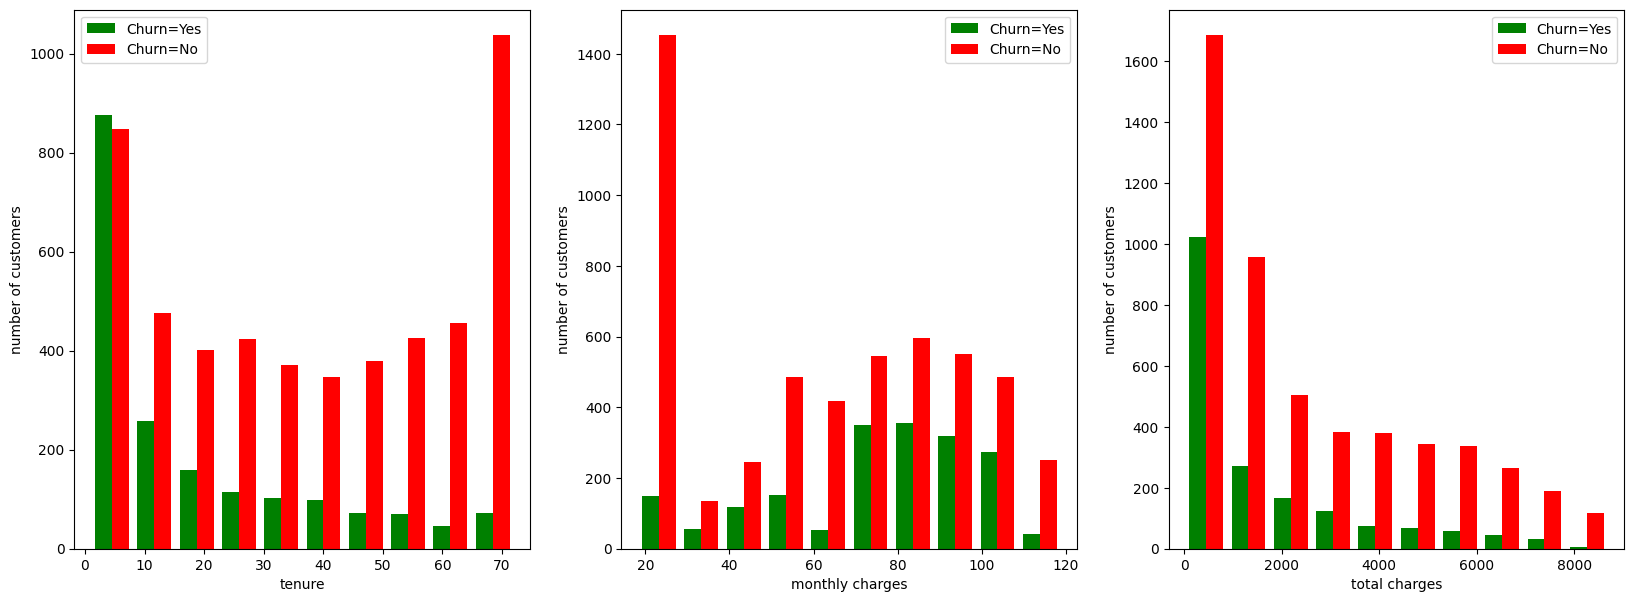

In [32]:
tenure_churn_yes = df1.tenure[df1.Churn == 'Yes']
tenure_churn_no = df1.tenure[df1.Churn == 'No']

mc_churn_yes = df1.MonthlyCharges[df1.Churn == 'Yes']
mc_churn_no = df1.MonthlyCharges[df1.Churn == 'No']

tc_churn_yes = df1.TotalCharges[df1.Churn == 'Yes']
tc_churn_no = df1.TotalCharges[df1.Churn == 'No'] 

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.xlabel('tenure')
plt.ylabel('number of customers')
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

plt.subplot(1,3,2)
plt.xlabel('monthly charges')
plt.ylabel('number of customers')
plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

plt.subplot(1,3,3)
plt.xlabel('total charges')
plt.ylabel('number of customers')
plt.hist([tc_churn_yes, tc_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()


Text(0.5, 1.0, 'Total Charges Boxplot')

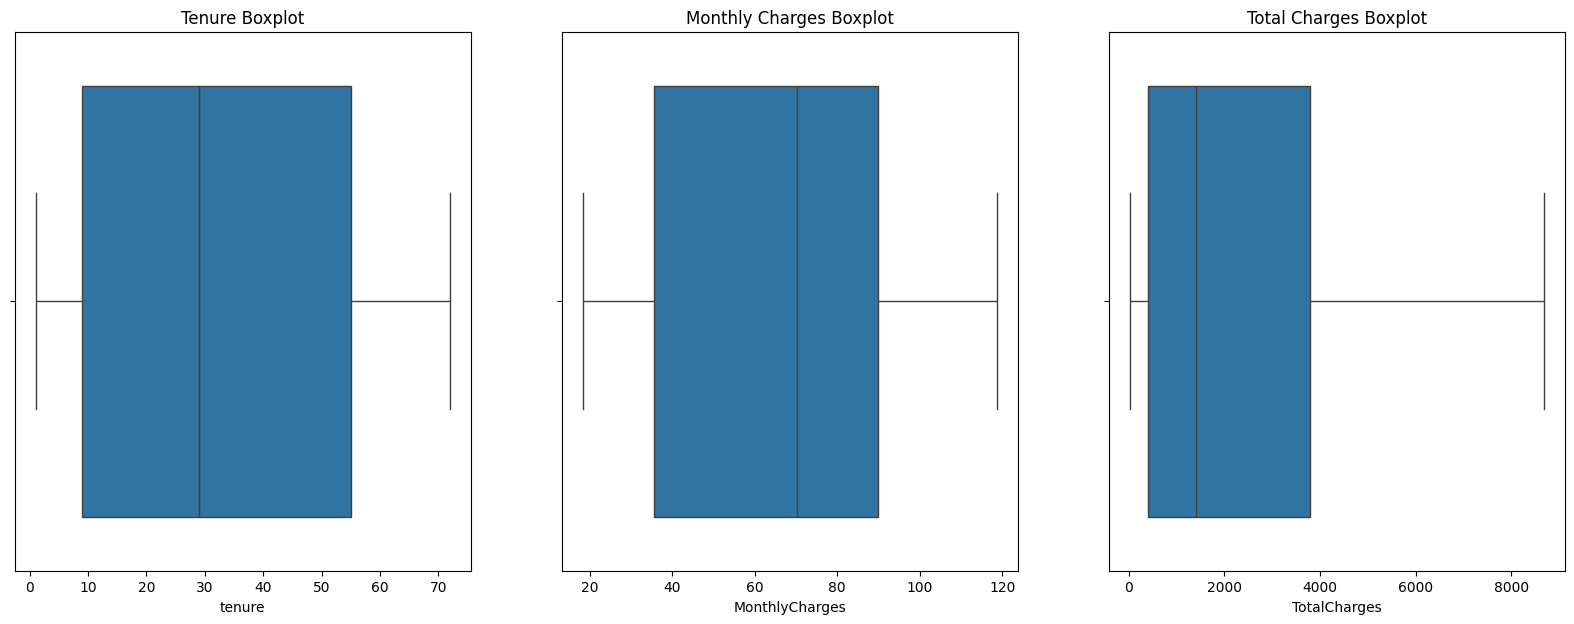

In [33]:
import seaborn as sn 

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sn.boxplot(data=df1, x='tenure')
plt.title('Tenure Boxplot')

plt.subplot(1,3,2)
sn.boxplot(data=df1, x='MonthlyCharges')
plt.title('Monthly Charges Boxplot')

plt.subplot(1,3,3)
sn.boxplot(data=df1, x='TotalCharges')
plt.title('Total Charges Boxplot')

In [34]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [35]:
def col_unique_values(df): 
    for col in df: 
        if df[col].dtypes == 'object': 
            print(f'{col}: {df[col].unique()}')

In [36]:
col_unique_values(df1) 

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
# to replace the these to sentences with No
df1.replace(['No internet service', 'No phone service'], 'No', inplace=True)  
col_unique_values(df1) 

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### Label Encoding

In [48]:
yes_no = df1['StreamingTV'].unique().astype(str)

In [56]:
# to get all columns that having only yes, no from the dataframe
def find_yes_no_cols(df): 
    yes_no_columns = []
    for col in df: 
        if df[col].unique().astype(str)[0] == 'No':
            yes_no_columns.append(col)
        elif df[col].unique().astype(str)[0] == 'Yes':
            yes_no_columns.append(col)
    return yes_no_columns

yes_no_columns = find_yes_no_cols(df1) 
yes_no_columns 

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [58]:
df1 = df1.replace({'Yes': 1, 'No': 0}) 

col_unique_values(df1) 

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 0]
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [59]:
df1.head() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [60]:
df1 = df1.replace({'Male': 1, 'Female': 0})
df1.sample() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3763,1,0,1,0,4,1,0,Fiber optic,0,0,0,0,1,0,Month-to-month,1,Electronic check,80.35,307.4,1


In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
df1[cols] 

df1[cols] = scaler.fit_transform(df1[cols])

df1[cols] 

,MonthlyCharges,TotalCharges,tenure
0,0.115423,0.001275,0.000000
1,0.385075,0.215867,0.464789
2,0.354229,0.010310,0.014085
3,0.239303,0.210241,0.619718
4,0.521891,0.015330,0.014085
...,...,...,...
7038,0.662189,0.227521,0.323944
7039,0.845274,0.847461,1.000000
7040,0.112935,0.037809,0.140845
7041,0.558706,0.033210,0.042254


In [65]:
col_unique_values(df1)

InternetService: ['DSL' 'Fiber optic' 0]
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [68]:
df1.InternetService = df1.InternetService.replace(0, 'No')
df1.InternetService.unique() 

array(['DSL', 'Fiber optic', 'No'], dtype=object)

#### One hot encoding

In [70]:
df1.shape

(7032, 20)

In [69]:
df2 = pd.get_dummies(df1, dtype=int) 
df2.head() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [78]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

Text(0.5, 1.0, 'Correlation Matrix')

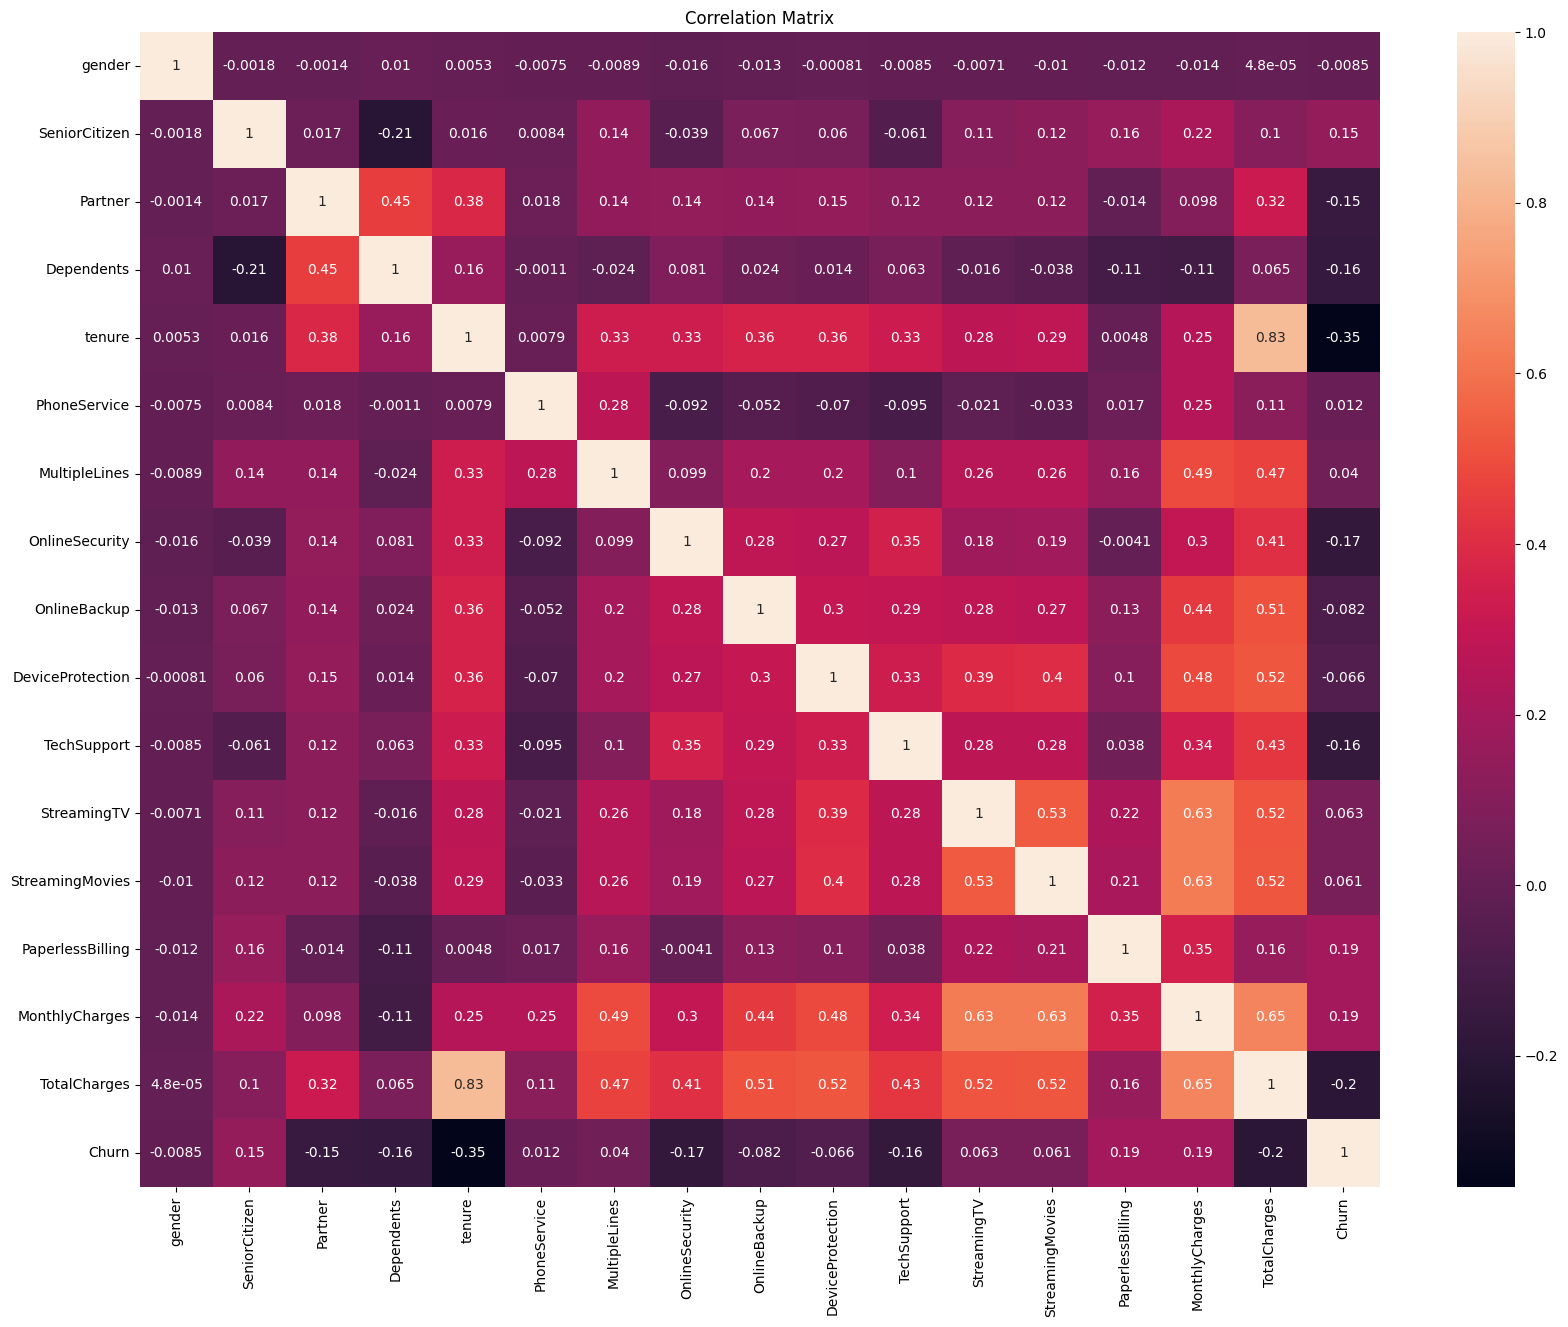

In [76]:
corr = df1.corr(numeric_only=True)  

import seaborn as sn 
plt.figure(figsize=(20,15)) 
sn.heatmap(corr, annot=True)
plt.title('Correlation Matrix') 


In [77]:
X = df2.drop('Churn', axis=1)
y = df2.Churn 

X.shape, y.shape 

((7032, 26), (7032,))

In [80]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=32) 

X_train.shape, X_test.shape 

((5625, 26), (1407, 26))

#### Model Building - ANN

In [87]:
import tensorflow as tf 
from tensorflow import keras
import tensorboard as tb
from keras.callbacks import EarlyStopping


In [88]:
len(X_train.columns)

26

In [93]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dropout(0.3),  # Dropout layer to reduce overfitting
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.3),  # Another Dropout layer
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# # Early stopping to stop training when validation loss doesn't improve
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.1,
    # callbacks=[early_stop]
)

Epoch 1/50
159/159 [==============================] - 2s 13ms/step - loss: 0.5629 - accuracy: 0.7211 - val_loss: 0.4512 - val_accuracy: 0.7780
Epoch 2/50
159/159 [==============================] - 1s 4ms/step - loss: 0.4794 - accuracy: 0.7590 - val_loss: 0.4218 - val_accuracy: 0.8224
Epoch 3/50
159/159 [==============================] - 1s 4ms/step - loss: 0.4615 - accuracy: 0.7683 - val_loss: 0.4183 - val_accuracy: 0.8277
Epoch 4/50
159/159 [==============================] - 2s 10ms/step - loss: 0.4513 - accuracy: 0.7770 - val_loss: 0.4157 - val_accuracy: 0.8224
Epoch 5/50
159/159 [==============================] - 1s 4ms/step - loss: 0.4448 - accuracy: 0.7801 - val_loss: 0.4153 - val_accuracy: 0.8259
Epoch 6/50
159/159 [==============================] - 1s 4ms/step - loss: 0.4411 - accuracy: 0.7874 - val_loss: 0.4123 - val_accuracy: 0.8295
Epoch 7/50
159/159 [==============================] - 1s 8ms/step - loss: 0.4395 - accuracy: 0.7930 - val_loss: 0.4114 - val_accuracy: 0.8259
Epoc

In [94]:
model.evaluate(X_test, y_test) 

44/44 [==============================] - 0s 9ms/step - loss: 0.4211 - accuracy: 0.8010


[0.4211236536502838, 0.8009950518608093]

In [95]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 3ms/step


array([[0.2710218 ],
       [0.00615982],
       [0.3853613 ],
       [0.00400212],
       [0.00147692]], dtype=float32)

In [96]:
y_test[:5]

4777    0
2920    0
3969    0
3414    0
6528    0
Name: Churn, dtype: int64

In [97]:
y_pred = []

for item in yp: 
    if item > 0.5:
        y_pred.append(1)
    else: 
        y_pred.append(0)

y_pred[:5]

[0, 0, 0, 0, 0]

In [98]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1024
           1       0.68      0.52      0.59       383

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

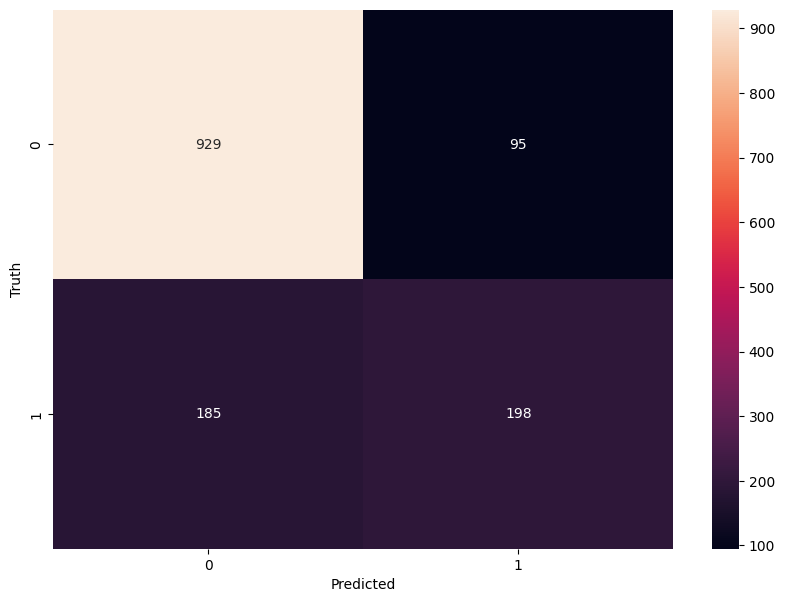

In [99]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth') 

In [ ]:
929/(929+185), 198/(198+95)

(0.8339317773788151, 0.6757679180887372)

In [102]:
929/(929+95),  198/(198+185)

(0.9072265625, 0.5169712793733682)

In [105]:
model.predict(X_test)[0]

44/44 [==============================] - 0s 3ms/step


array([0.2710218], dtype=float32)

In [114]:
def predict_churn(index): 
    print(f'Predicted: {y_pred[index]}')
    print(f'Truth: {list(y_test)[index]}') 

In [118]:
predict_churn(200) 

Predicted: 0
Truth: 0


In [119]:
predict_churn(5)

Predicted: 0
Truth: 0
